<a href="https://colab.research.google.com/github/Lakshaykumarr28/Prasunet_Company_projects/blob/main/Prasunet_ML_05/food_Calorie_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Classification and Calorie Estimation

Create a model capable of accurately identifying food items within an image and predicting their corresponding calorie count to aid in maintaining a healthy and balanced diet.

Dataset used : http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz also available at https://www.kaggle.com/dansbecker/food-101

Importing essential libraries

In [1]:
import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models
import cv2

In [2]:
# Check if GPU is enabled
print(tf.__version__)
print(tf.test.gpu_device_name())

2.17.0
/device:GPU:0


Downloading the Dataset and unzipping it in Google Colab Environment

In [24]:
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
print("Dataset downloaded!")
print("Extracting data..")
!tar xzvf food-101.tar.gz
print("Extraction done!")

Streaming output truncated to the last 5000 lines.
food-101/images/cannoli/1767088.jpg
food-101/images/cannoli/3201965.jpg
food-101/images/cannoli/3778102.jpg
food-101/images/cannoli/2674065.jpg
food-101/images/cannoli/1169899.jpg
food-101/images/cannoli/1378086.jpg
food-101/images/cannoli/803909.jpg
food-101/images/cannoli/1067240.jpg
food-101/images/cannoli/3002709.jpg
food-101/images/cannoli/2612632.jpg
food-101/images/cannoli/3627612.jpg
food-101/images/cannoli/1798703.jpg
food-101/images/cannoli/560632.jpg
food-101/images/cannoli/512468.jpg
food-101/images/cannoli/2331523.jpg
food-101/images/cannoli/3118302.jpg
food-101/images/cannoli/1499412.jpg
food-101/images/cannoli/1557459.jpg
food-101/images/cannoli/146566.jpg
food-101/images/cannoli/96922.jpg
food-101/images/cannoli/1699562.jpg
food-101/images/cannoli/730051.jpg
food-101/images/cannoli/2177977.jpg
food-101/images/cannoli/2767028.jpg
food-101/images/cannoli/6564.jpg
food-101/images/cannoli/553447.jpg
food-101/images/cannoli/

Listing Food items directories

In [25]:
os.listdir('food-101/images')

['bruschetta',
 'fish_and_chips',
 'ceviche',
 'takoyaki',
 'spring_rolls',
 'cup_cakes',
 'peking_duck',
 'huevos_rancheros',
 'beignets',
 'fried_rice',
 'fried_calamari',
 'french_toast',
 'steak',
 'pho',
 'churros',
 'club_sandwich',
 'grilled_cheese_sandwich',
 'chicken_quesadilla',
 'waffles',
 'ramen',
 'ice_cream',
 'carrot_cake',
 'paella',
 'pancakes',
 'beef_carpaccio',
 'lasagna',
 'dumplings',
 'french_onion_soup',
 'sashimi',
 'french_fries',
 'panna_cotta',
 'pizza',
 'bibimbap',
 'frozen_yogurt',
 'spaghetti_bolognese',
 'cheese_plate',
 'chocolate_mousse',
 'mussels',
 'breakfast_burrito',
 'hamburger',
 'seaweed_salad',
 'ravioli',
 'poutine',
 'hummus',
 'nachos',
 'edamame',
 'chocolate_cake',
 'baby_back_ribs',
 'lobster_bisque',
 'crab_cakes',
 'beet_salad',
 'pork_chop',
 'spaghetti_carbonara',
 'lobster_roll_sandwich',
 'onion_rings',
 'prime_rib',
 'pulled_pork_sandwich',
 'tiramisu',
 'tuna_tartare',
 'caesar_salad',
 'foie_gras',
 'caprese_salad',
 'tacos',


Meta Files

In [27]:
os.listdir('food-101/meta')

['train.json',
 'labels.txt',
 'classes.txt',
 'train.txt',
 'test.json',
 'test.txt']

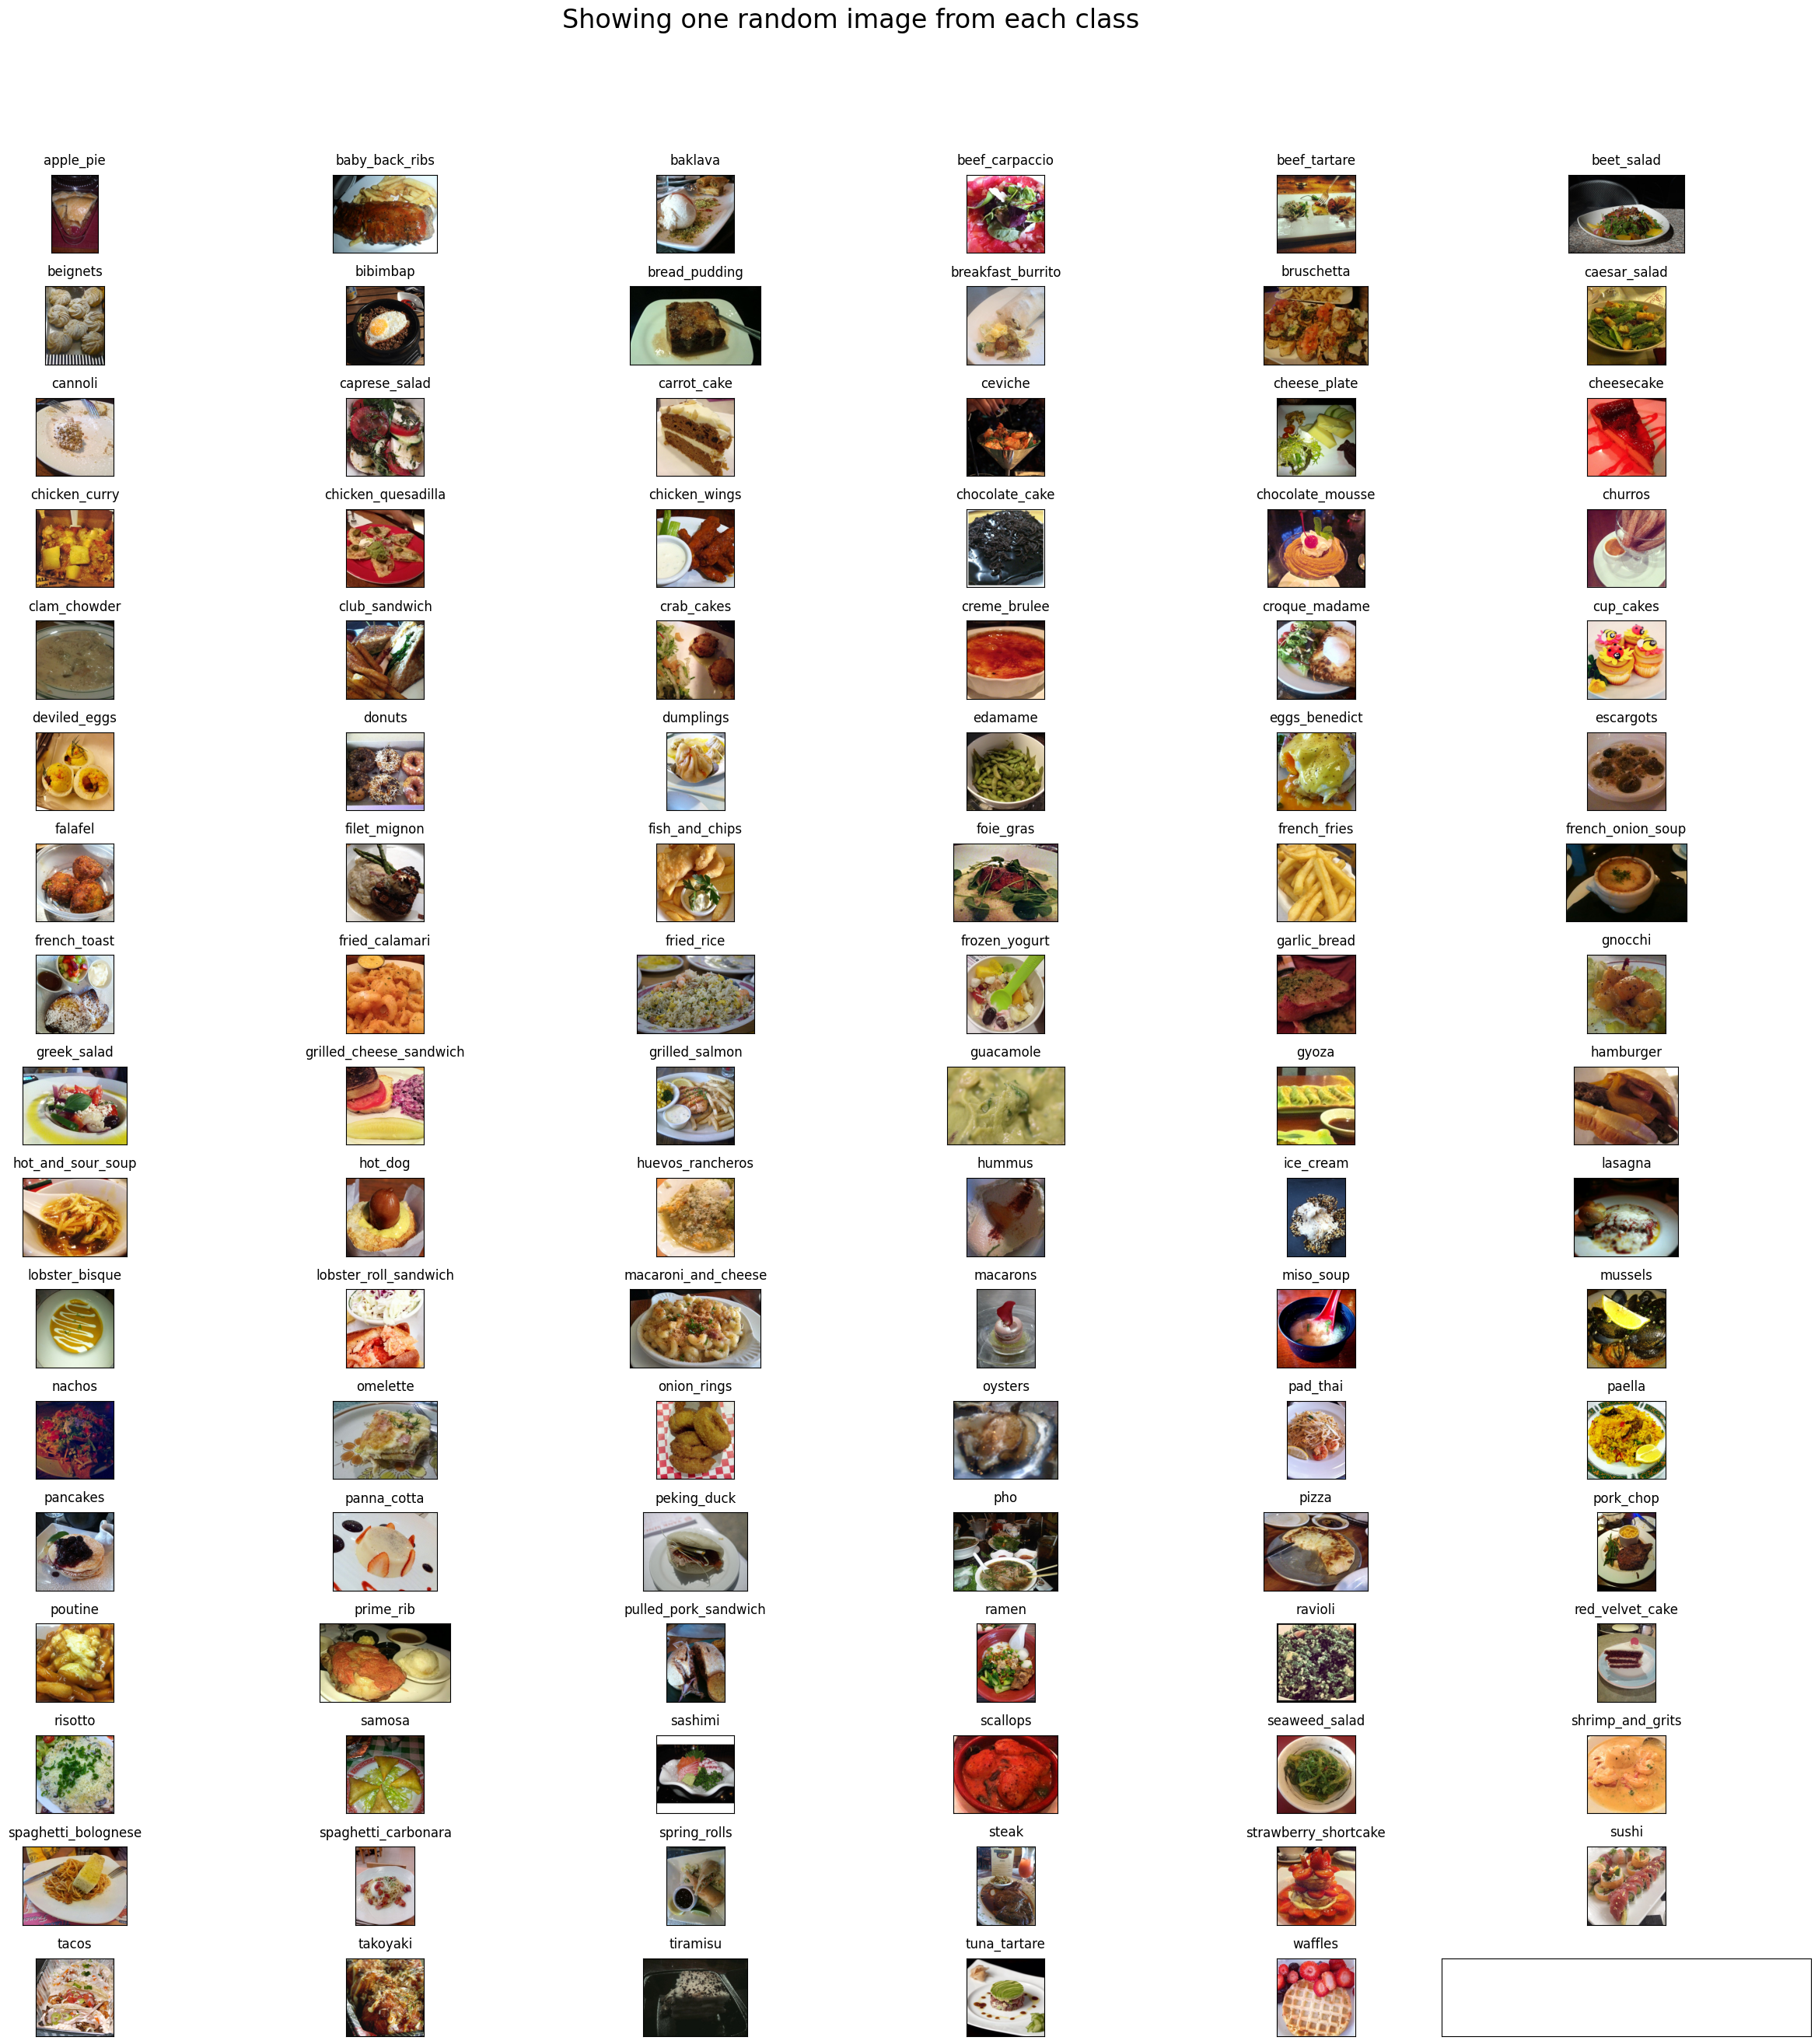

In [28]:
# Visualize the data, showing one image per class from 101 classes
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
data_dir = "food-101/images/"
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id]
      food_id += 1
    except:
      break
    if food_selected == '.DS_Store':
        continue
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) # returns the list of all files present in each food category
    food_selected_random = np.random.choice(food_selected_images) # picks one food item from the list as choice, takes a list and returns one random item
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)

plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()